**EstateFP**

In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
dfPub = pd.read_csv('estate_cdk2.csv')

In [4]:
dfPub.head(2)

,Unnamed: 0,activity,EStateFP1,EStateFP2,EStateFP3,EStateFP4,EStateFP5,EStateFP6,EStateFP7,EStateFP8,...,EStateFP70,EStateFP71,EStateFP72,EStateFP73,EStateFP74,EStateFP75,EStateFP76,EStateFP77,EStateFP78,EStateFP79
0,0,inactive,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,active,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dfPub1= dfPub.drop(['Unnamed: 0'], axis=1)

In [6]:
#dfPub1.head(2)
#len(dfPub1)
#dfPub1.info()
dfPub1.isnull().sum().sum()

np.int64(0)

In [7]:
import numpy as np

from sklearn.model_selection import train_test_split

In [8]:
dfPub1.head(2)

,activity,EStateFP1,EStateFP2,EStateFP3,EStateFP4,EStateFP5,EStateFP6,EStateFP7,EStateFP8,EStateFP9,...,EStateFP70,EStateFP71,EStateFP72,EStateFP73,EStateFP74,EStateFP75,EStateFP76,EStateFP77,EStateFP78,EStateFP79
0,inactive,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,active,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


**LabelEncoder**

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()

dfPub1['activity']= label_encoder.fit_transform(dfPub1['activity'])


dfPub1['activity'].value_counts()

,count
activity,
1,839
0,518


In [10]:
X = dfPub1.drop('activity', axis=1)
X.head(3)

,EStateFP1,EStateFP2,EStateFP3,EStateFP4,EStateFP5,EStateFP6,EStateFP7,EStateFP8,EStateFP9,EStateFP10,...,EStateFP70,EStateFP71,EStateFP72,EStateFP73,EStateFP74,EStateFP75,EStateFP76,EStateFP77,EStateFP78,EStateFP79
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
y = dfPub1.activity
y.head(3)

,activity
0,1
1,0
2,0


In [12]:
#y.value_counts().plot.pie(autopct='%.2f')

**DATA SPLIT**

In [13]:
X.shape, y.shape

((1357, 79), (1357,))

In [14]:
len(y)

1357

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [17]:
y_train.value_counts()

,count
activity,
1,752
0,752


**Preprocessing**

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1504, 79), (1504,), (136, 79), (136,))

**LogisticRegression**

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.86      0.76        49
           1       0.91      0.78      0.84        87

    accuracy                           0.81       136
   macro avg       0.80      0.82      0.80       136
weighted avg       0.83      0.81      0.81       136



**confusion_matrix**

In [22]:
confusion_matrix(y_test,y_pred)

array([[42,  7],
       [19, 68]])

In [23]:
import matplotlib.pyplot as plt


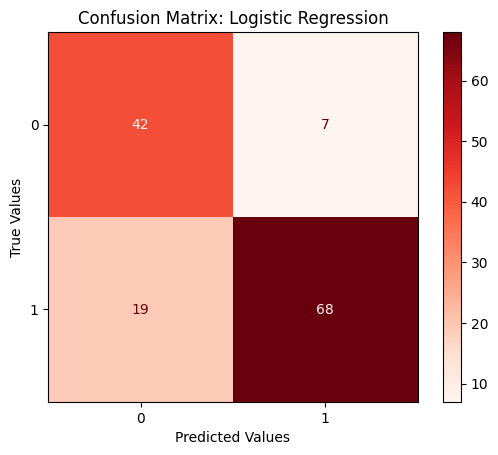

In [24]:

cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**AUC**-**ROC**

In [25]:
rlr_probs = [0 for _ in range(len(y_test))]
rflr_probs = lr.predict_proba(X_test)

rflr_probs = rflr_probs[:, 1]

rflr_auc = roc_auc_score(y_test, rflr_probs)
print('Logistic Regression: AUC_ROC = %.3f' % (rflr_auc))

Logistic Regression: AUC_ROC = 0.873


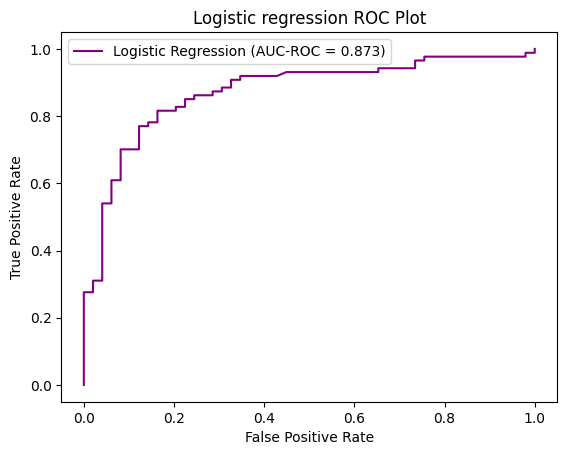

In [26]:
rflr_fpr, rflr_tpr, _ = roc_curve(y_test, rflr_probs)

plt.plot(rflr_fpr, rflr_tpr, label='Logistic Regression (AUC-ROC = %0.3f)' % rflr_auc, color='purple')
# Title
plt.title('Logistic regression ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('Logistic Regression ROC Plot')

# Show plot
plt.show()

**KNeighborsClassifier**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        49
           1       0.94      0.85      0.89        87

    accuracy                           0.87       136
   macro avg       0.85      0.87      0.86       136
weighted avg       0.88      0.87      0.87       136



**confusion_matrix**

In [28]:
confusion_matrix(y_test,y_pred)

array([[44,  5],
       [13, 74]])

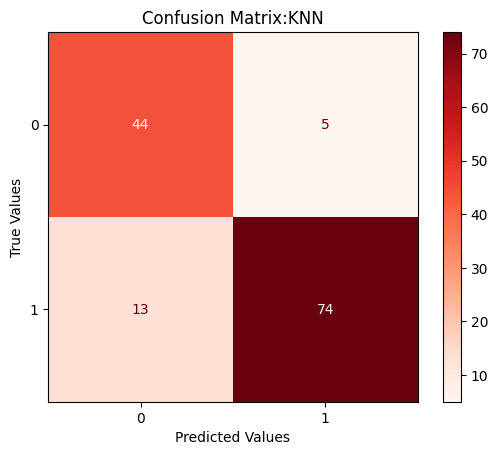

In [29]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix:KNN')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()


**AUC**-*ROC*

In [30]:
rknn_probs = [0 for _ in range(len(y_test))]
rfknn_probs = knn.predict_proba(X_test)

rfknn_probs = rfknn_probs[:, 1]

rfknn_auc = roc_auc_score(y_test, rfknn_probs)
print('KNN: AUC_ROC = %.3f' % (rfknn_auc))

KNN: AUC_ROC = 0.940


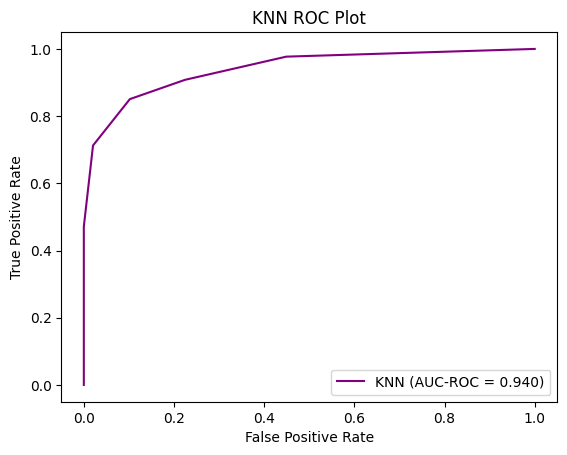

In [31]:
rfknn_fpr, rfknn_tpr,_ = roc_curve(y_test, rfknn_probs)

plt.plot(rfknn_fpr, rfknn_tpr, label='KNN (AUC-ROC = %0.3f)' % rfknn_auc, color='purple')
# Title
plt.title('KNN ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('KNN ROC Plot')

# Show plot
plt.show()

**DecisionTree**

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        49
           1       0.87      0.82      0.84        87

    accuracy                           0.80       136
   macro avg       0.78      0.80      0.79       136
weighted avg       0.81      0.80      0.80       136



**confusion_matrix**

In [33]:
confusion_matrix(y_test,y_pred)

array([[38, 11],
       [16, 71]])

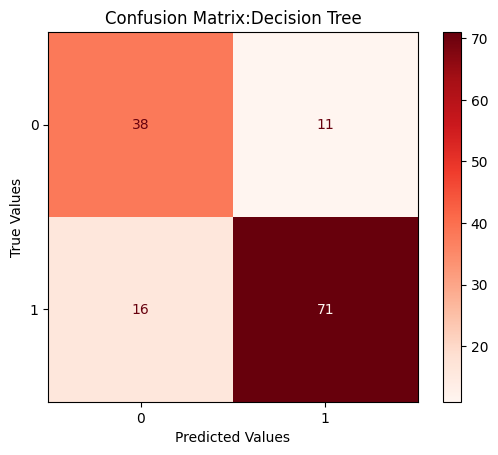

In [34]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix:Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**AUC**-**ROC**

In [35]:
rdt_probs = [0 for _ in range(len(y_test))]
rfdt_probs = dtr.predict_proba(X_test)

rfdt_probs = rfdt_probs[:, 1]

rfdt_auc = roc_auc_score(y_test, rfdt_probs)
print('Decision Tree: AUC_ROC = %.3f' % (rfdt_auc))

Decision Tree: AUC_ROC = 0.807


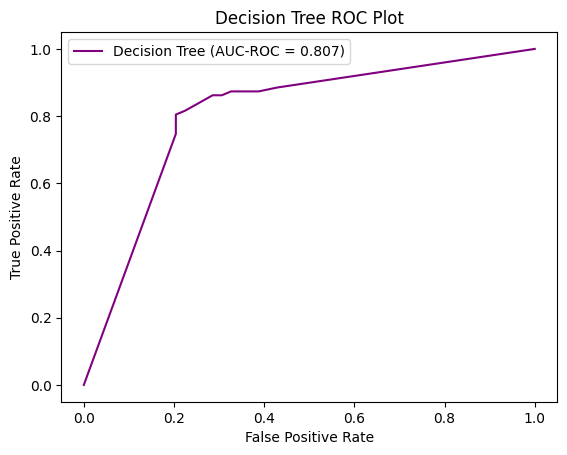

In [37]:
rfdt_fpr, rfdt_tpr, _ = roc_curve(y_test, rfdt_probs)

plt.plot(rfdt_fpr, rfdt_tpr, label='Decision Tree (AUC-ROC = %0.3f)' % rfdt_auc, color='purple')
# Title
plt.title('Decision Tree ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('Decision Tree ROC Plot')

# Show plot
plt.show()


RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        49
           1       0.89      0.86      0.88        87

    accuracy                           0.85       136
   macro avg       0.83      0.84      0.83       136
weighted avg       0.85      0.85      0.85       136



**confusion_matrix**

In [40]:
confusion_matrix(y_test,y_pred)

array([[40,  9],
       [12, 75]])

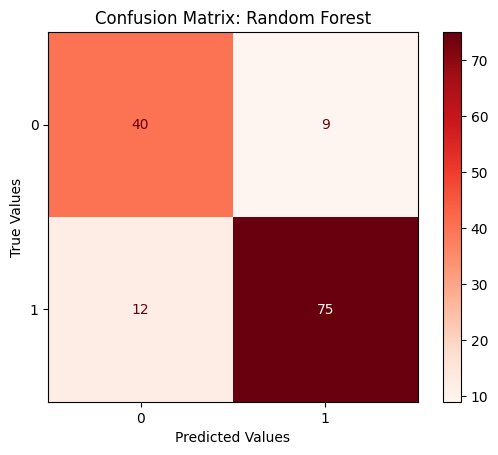

In [41]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**AUC**-**ROC**

In [42]:
rrf_probs = [0 for _ in range(len(y_test))]
rfrf_probs = rfc.predict_proba(X_test)

rfrf_probs = rfrf_probs[:, 1]

rfrf_auc = roc_auc_score(y_test, rfrf_probs)
print('Random Forest: AUC_ROC = %.3f' % (rfrf_auc))


Random Forest: AUC_ROC = 0.918


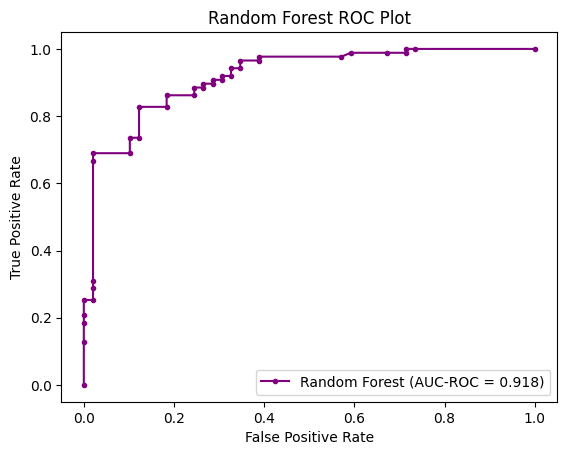

In [43]:
rfrf_fpr, rfrf_tpr, _ = roc_curve(y_test, rfrf_probs)

plt.plot(rfrf_fpr, rfrf_tpr, marker='.', label='Random Forest (AUC-ROC = %0.3f)' % rfrf_auc, color='purple')
# Title
plt.title('Random Forest ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('Random Forest ROC Plot')

# Show plot
plt.show()


**XGBoost**

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=20)
xgb.fit(X_train,y_train) # creating of the model
y_pred=xgb.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        49
           1       0.88      0.82      0.85        87

    accuracy                           0.81       136
   macro avg       0.79      0.81      0.80       136
weighted avg       0.82      0.81      0.81       136



**confusion_matrix**

In [45]:
confusion_matrix(y_test,y_pred)

array([[39, 10],
       [16, 71]])

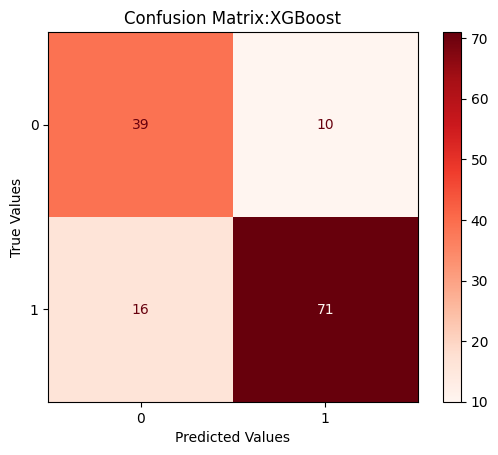

In [46]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix:XGBoost')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**AUC**-**ROC**

In [47]:
rxgb_probs = [0 for _ in range(len(y_test))]
rfxgb_probs = xgb.predict_proba(X_test)

rfxgb_probs = rfxgb_probs[:, 1]

rfxgb_auc = roc_auc_score(y_test, rfxgb_probs)
print('XGBoost: AUC_ROC = %.3f' % (rfxgb_auc))

XGBoost: AUC_ROC = 0.918


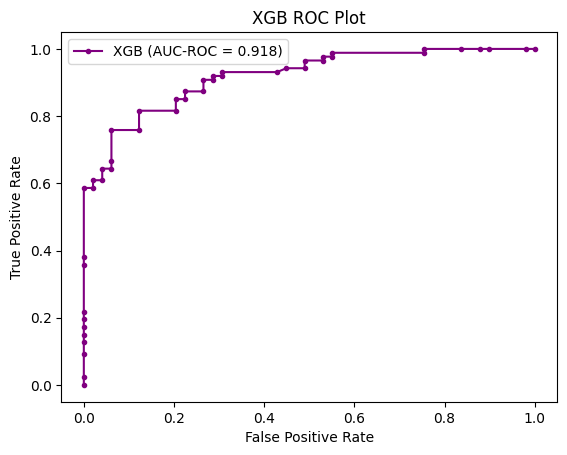

In [48]:
rfxgb_fpr, rfxgb_tpr, _ = roc_curve(y_test, rfxgb_probs)

plt.plot(rfxgb_fpr, rfxgb_tpr, marker='.', label='XGB (AUC-ROC = %0.3f)' % rfxgb_auc, color='purple')
# Title
plt.title('XGB ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('XGBoost ROC Plot')

# Show plot
plt.show()

**NN**

In [49]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential

In [50]:
estate = Sequential()

estate.add(Dense(12, input_dim=79, activation='relu'))

estate.add(Dense(6, activation='relu'))


estate.add(Dense(1, activation='sigmoid'))

estate.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
estate.fit(X_train, y_train, epochs=100,validation_split=0.2, batch_size=50)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5113 - loss: 0.7524 - val_accuracy: 0.3256 - val_loss: 0.8208
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6079 - loss: 0.6672 - val_accuracy: 0.3754 - val_loss: 0.7795
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6580 - loss: 0.6342 - val_accuracy: 0.4053 - val_loss: 0.7753
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6847 - loss: 0.6120 - val_accuracy: 0.4352 - val_loss: 0.7669
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7325 - loss: 0.5824 - val_accuracy: 0.4817 - val_loss: 0.7606
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7349 - loss: 0.5635 - val_accuracy: 0.4983 - val_loss: 0.7547
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7415 - loss: 0.5460 - val_accuracy: 0.5382 - val_loss: 0.7475
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7416 - loss: 0.5452 - val_accuracy: 0.5449 - 

In [52]:
y_pred = estate.predict(X_test).round()

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        49
           1       0.90      0.87      0.89        87

    accuracy                           0.86       136
   macro avg       0.85      0.86      0.85       136
weighted avg       0.86      0.86      0.86       136



**confusion_matrix**

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[41,  8],
       [11, 76]])

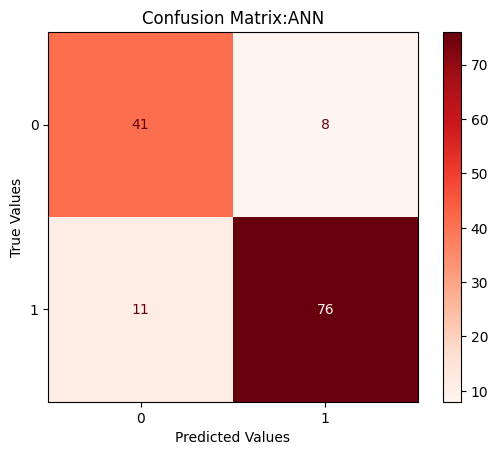

In [54]:
cm= confusion_matrix(y_test,y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix:ANN')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**AUC**-**ROC**

In [55]:

rfann_auc = roc_auc_score(y_test, y_pred)
print('NN: AUC_ROC = %.3f' % (rfann_auc))

NN: AUC_ROC = 0.855


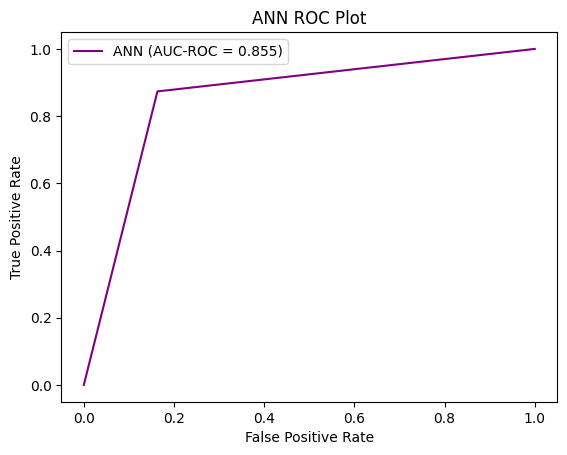

In [56]:
rfann_fpr, rfann_tpr, _ = roc_curve(y_test, y_pred)

plt.plot(rfann_fpr, rfann_tpr, label='ANN (AUC-ROC = %0.3f)' % rfann_auc, color='purple')
# Title
plt.title('ANN ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('ANN ROC Plot')

# Show plot
plt.show()

In [57]:
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

**All** **ROC plots Combined**

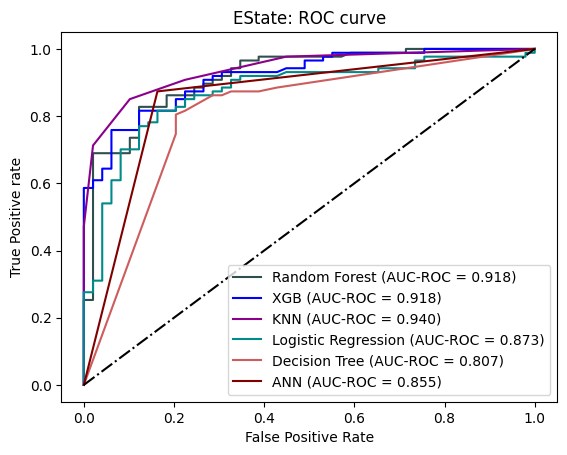

In [58]:
# plot roc curves

plt.plot(rfrf_fpr, rfrf_tpr,  label='Random Forest (AUC-ROC = %0.3f)' % rfrf_auc, color='darkslategray')
plt.plot(rfxgb_fpr, rfxgb_tpr,  label='XGB (AUC-ROC = %0.3f)' % rfxgb_auc, color='blue')
plt.plot(rfknn_fpr, rfknn_tpr, label='KNN (AUC-ROC = %0.3f)' % rfknn_auc, color='darkmagenta')
plt.plot(rflr_fpr, rflr_tpr, label='Logistic Regression (AUC-ROC = %0.3f)' % rflr_auc, color='darkcyan')
plt.plot(rfdt_fpr, rfdt_tpr, label='Decision Tree (AUC-ROC = %0.3f)' % rfdt_auc, color='indianred')
plt.plot(rfann_fpr, rfann_tpr, label='ANN (AUC-ROC = %0.3f)' % rfann_auc, color='maroon')

plt.plot(p_fpr, p_tpr, linestyle='-.', color='black')






# title
plt.title('EState: ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('Estate: ROC curve',dpi=300)
plt.show();